# 線形回帰
- 最小二乗法
- ロバスト回帰（Huber, RAMSAC, etc)
- ラッソ回帰（L1正則化）、リッジ回帰（L2正則化）、カーネル回帰

In [1]:
import numpy as np               
import matplotlib.pyplot as plt  
import pandas as pd
import statsmodels.api as sm

## 最小二乗法: Ordinary Least Squares (OLS)

## sklearn.linearmodel.LinearRegression() と　statsmodel.api.OLS()
- 結果は同じ
- sklearnはシンプルだが、得られる情報は単回帰式とR-squareのみ
- statsmodelはcoefカラムを追加するという謎の操作が入るが、得られる情報が多い.. summary()関数の出力参照

In [7]:
# データ読込み
df_UN = pd.read_csv('data/UN.csv', index_col=0)
df_UN.head()

,infant.mortality,gdp
Afghanistan,154.0,2848.0
Albania,32.0,863.0
Algeria,44.0,1531.0
American.Samoa,11.0,NaN
Andorra,NaN,NaN


In [13]:
UN = np.array(df_UN.values).astype('float64')
print(UN.shape)  # データ行列のサイズ
print(UN[:5])

(207, 2)
[[ 154. 2848.]
 [  32.  863.]
 [  44. 1531.]
 [  11.   nan]
 [  nan   nan]]


In [14]:
UN = UN[~np.isnan(UN).any(axis=1),:]  # nanを含むデータを除く
UN.shape  # nanを除いたデータ行列のサイズ
print(UN[:5])

[[ 154. 2848.]
 [  32.  863.]
 [  44. 1531.]
 [ 124.  355.]
 [  24. 6966.]]


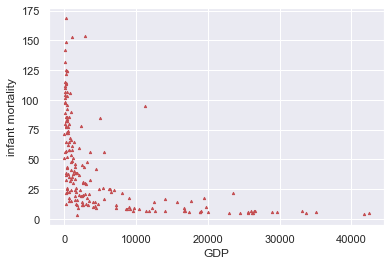

In [33]:
fig, ax = plt.subplots()
ax.scatter(x=UN[:,1], y=UN[:,0], s=5, c='r', marker='^')
ax.set(ylabel='infant mortality', xlabel='GDP');

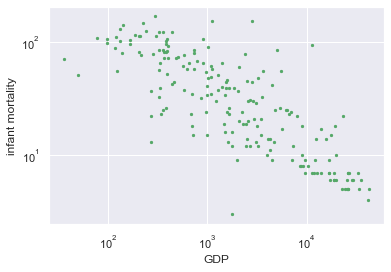

In [37]:
fig, ax = plt.subplots()
ax.scatter(x=UN[:,1], y=UN[:,0], s=5, c='g', marker='o')
ax.set(ylabel='infant mortality', xlabel='GDP', yscale='log', xscale='log');

## sklearnでOLS

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
logUN = np.log(UN)           # データを対数で変換
# データ
x = logUN[:,1].reshape(-1,1)
y = logUN[:,0] 

In [95]:
lr = LinearRegression()

In [96]:
lr.fit(x,y)
print(lr.coef_)#傾き
print(lr.rank_)
print(lr.singular_)
print(lr.intercept_)#切片

[-0.49320262]
1
[22.96120204]
7.045200799351165


In [97]:
lr.score(x,y)#R-square

0.6556417238359502

In [98]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

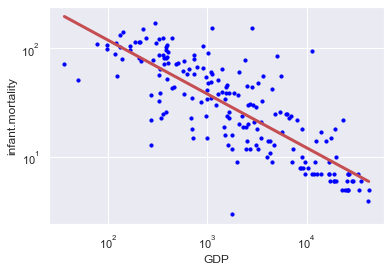

In [99]:
tx = np.linspace(x.min(),x.max(),100).reshape(-1,1) # 予測点の生成                        
py = lr.predict(tx)                                # 予測値
plt.xlabel('GDP'); plt.ylabel('infant.mortality')
plt.xscale("log"); plt.yscale("log")
plt.scatter(UN[:,1],UN[:,0], s=10, c='blue')        # データ点のプロット
plt.plot(np.exp(tx),np.exp(py),'r-',lw=3)           # 予測結果のプロット
plt.show()

## statsmodelsでOLS

In [100]:
logUN = np.log(UN)           # データを対数で変換
# データ
x = logUN[:,1]
y = logUN[:,0] 

In [101]:
xc = sm.add_constant(x)      # 定数項に対応する列を加える
xc[:5]

array([[1.        , 7.95437227],
       [1.        , 6.76041469],
       [1.        , 7.3336764 ],
       [1.        , 5.87211779],
       [1.        , 8.84879645]])

In [102]:
lf = sm.OLS(y,xc).fit()      # 最小二乗法

In [103]:
lf.params                    # 推定された定数項と係数

array([ 7.0452008 , -0.49320262])

In [104]:
lf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     363.7
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           4.32e-46
Time:                        00:33:11   Log-Likelihood:                -172.27
No. Observations:                 193   AIC:                             348.5
Df Residuals:                     191   BIC:                             355.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0452      0.199     35.379      0.000       6.652       7.438
x1            -0.4932      0.026    -19.070      0.000      -0.544      -0.442
==============================================================================
Omnibus:                       10.055   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               21.166
Skew:                           0.097   Prob(JB):                     2.53e-05
Kurtosis:                       4.611   Cond. No.                         36.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
lf.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.654   
Dependent Variable: y                AIC:                348.5429
Date:               2020-11-26 00:33 BIC:                355.0683
No. Observations:   193              Log-Likelihood:     -172.27 
Df Model:           1                F-statistic:        363.7   
Df Residuals:       191              Prob (F-statistic): 4.32e-46
R-squared:          0.656            Scale:              0.35266 
-------------------------------------------------------------------
          Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     7.0452     0.1991    35.3790   0.0000    6.6524    7.4380
x1       -0.4932     0.0259   -19.0697   0.0000   -0.5442   -0.4422
-----------------------------------------------------------------
Omnibus:              10.055       Durbin-Watson:          1.864 
Prob(Omnibus):        0.007        Jarque-Bera (JB):       21.166
Skew:                 0.097        Prob(JB):               0.000 
Kurtosis:             4.611        Condition No.:          36    
=================================================================

"""

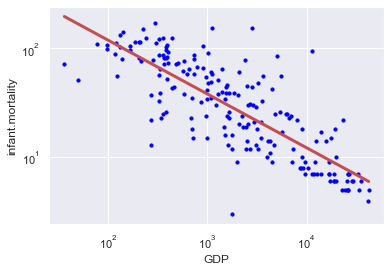

In [106]:
tx = np.linspace(x.min(),x.max(),100).reshape(-1,1) # 予測点の生成
txc = sm.add_constant(tx)                           
py = lf.predict(txc)                                # 予測値
plt.xlabel('GDP'); plt.ylabel('infant.mortality')
plt.xscale("log"); plt.yscale("log")
plt.scatter(UN[:,1],UN[:,0], s=10, c='blue')        # データ点のプロット
plt.plot(np.exp(tx),np.exp(py),'r-',lw=3)           # 予測結果のプロット
plt.show()

# ロバスト回帰：外れ値(outliers)の影響を抑えるアルゴリズム
- Huber Regressionは外れ値(outliers)に耐性のある回帰
- RANSAC Regressionはy方向の外れ値を無視する回帰

In [110]:
# Davisの体重と身長のデータを読込み
dat = np.array(pd.read_csv('data/Davis.csv').values[:,1:3]).astype('float64')
dat = dat[~np.isnan(dat).any(axis=1),:]  # nanを含むデータを除く
x = dat[:,0].reshape(-1,1)      # 身長[cm]
y = dat[:,-1]                   # 体重[kg]のデータ行列

## sklearnでHuber

In [111]:
from sklearn.linear_model import HuberRegressor

In [112]:
# 比較用の普通の線形回帰
linear = LinearRegression()
linear.fit(x,y)

LinearRegression()

In [113]:
# Huber回帰
huber = HuberRegressor()
huber.fit(x,y)

HuberRegressor()

In [114]:
print(huber.coef_)#傾き
print(huber.intercept_)#切片
print(huber.scale_)
print(huber.n_iter_)
print(huber.outliers_)

[0.51167594]
137.02280092049764
3.703240350367849
30
[ True  True False  True  True  True  True  True False False False  True
 False False False False False False  True  True  True False False False
  True False False False False  True  True False False False False  True
 False False False  True False False  True  True False False  True False
  True  True False False  True False  True  True False  True False  True
  True False  True False False  True False  True  True False  True False
 False False False  True False  True  True  True False False False False
 False  True  True False False False False False False  True  True False
 False  True False  True False  True False False  True False  True False
 False False False False  True  True  True False False False  True  True
 False  True  True False  True  True  True False False False False False
  True  True False False False False False  True False False False  True
 False  True False  True False False False False  True False False Fals

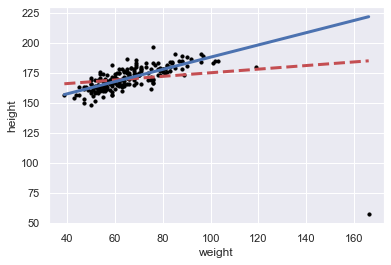

In [115]:
tx = np.linspace(x.min(),x.max(),100).reshape(-1,1)    # 予測点
# プロット
plt.xlabel('weight'); plt.ylabel('height')
plt.scatter(x,y,s=10,c='black')
plt.plot(tx,linear.predict(tx),'r--',lw=3)   # 最小二乗法による予測点
plt.plot(tx,huber.predict(tx),'b-', lw=3)   # Huber推定による予測点
plt.show()

## sklearnでRANSAC

In [116]:
# RANSAC
from sklearn.linear_model import RANSACRegressor

In [117]:
# RANSACインスタンスの作成
# base_estimator引数に回帰インスタンスを入れる（デフォルトはLinearRegressor())
ransac = RANSACRegressor(base_estimator=LinearRegression()).fit(x,y)

In [118]:
print(ransac.estimator_)
print(ransac.n_trials_)
print(ransac.inlier_mask_)
print(ransac.n_skips_no_inliers_)
print(ransac.n_skips_invalid_data_)
print(ransac.n_skips_invalid_model_)

LinearRegression()
5
[ True  True  True  True False  True False False  True  True  True False
  True  True  True  True  True  True False  True False  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True False  True  True False  True  True  True  True  True
 False False  True  True  True  True False  True  True False  True  True
 False  True False  True  True  True  True  True False  True  True  True
  True  True  True False  True False False False  True  True  True  True
  True False False  True  True  True  True  True  True False False  True
  True  True  True False  True False  True  True  True  True False  True
  True  True  True  True False False False  True  True  True  True False
  True  True  True  True False  True False  True  True  True  True  True
  True False  True  True  True  True  True False  True  True  True False
  True  True  True False  True  True  True  True False  True  True  True
  True  True  True  True  True

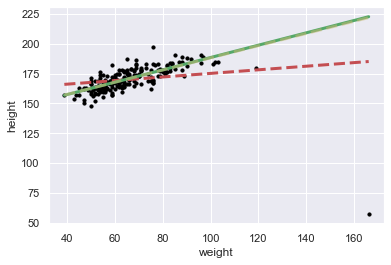

In [124]:
tx = np.linspace(x.min(),x.max(),100).reshape(-1,1)    # 予測点
# プロット
plt.xlabel('weight'); plt.ylabel('height')
plt.scatter(x,y,s=10,c='black')
plt.plot(tx,linear.predict(tx),'r--',lw=3)   # 最小二乗法による予測点
plt.plot(tx,ransac.predict(tx),'g-', lw=3)   # RANSACによる予測点
plt.plot(tx,huber.predict(tx),'y--', lw=3, alpha=0.5) # Huber
plt.show()

## statsmodelsでHuber

In [125]:
xc = sm.add_constant(x)         # データ行列に定数項の列を追加
lf = sm.OLS(y, xc).fit()        # 最小二乗法 
lf.params                       # 回帰係数の推定値：(定数項，傾き)

array([1.60093116e+02, 1.50864502e-01])

In [126]:
# 外れ値を除いたデータに最小二乗法を適用
lfr = sm.OLS(np.delete(y,11,0), np.delete(xc,11,0)).fit()
lfr.params                       # 推定された回帰係数

array([136.83660744,   0.51689358])

In [127]:
rf = sm.RLM(y,xc).fit()          # Huber損失によるロバスト推定
rf.params                        # 推定された回帰係数

array([137.81427721,   0.50076743])

In [128]:
rf.scale                         # 推定されたスケール(標準偏差)

5.7176346561692615

In [129]:
rf.summary2()                    # 結果の要約

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Robust linear model
=========================================================
Model:              RLM              Df Residuals: 198   
Dependent Variable: y                Norm:         HuberT
Date:               2020-11-26 00:37 Scale Est.:   mad   
No. Observations:   200              Cov. Type:    H1    
Df Model:           1                Scale:        5.7176
---------------------------------------------------------
        Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
---------------------------------------------------------
const  137.8143   1.7453 78.9642 0.0000 134.3936 141.2350
x1       0.5008   0.0259 19.3678 0.0000   0.4501   0.5514
=========================================================

"""

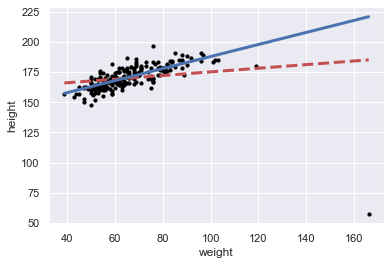

In [130]:
tx = np.linspace(x.min(),x.max(),100).reshape(-1,1)    # 予測点
txc = sm.add_constant(tx)
# プロット
plt.xlabel('weight'); plt.ylabel('height')
plt.scatter(x,y,s=10,c='black')
plt.plot(tx,lf.predict(txc),'r--',lw=3)   # 最小二乗法による予測点
plt.plot(tx,rf.predict(txc),'b-', lw=3)   # ロバスト推定による予測点
plt.show()

## statsmodelsで他のロバスト回帰アルゴリズムを使う
- https://www.statsmodels.org/stable/rlm.html
- 色々選べる

In [131]:
# Hampel損失
rfh = sm.RLM(y,xc,M=sm.robust.norms.Hampel()).fit()
rfh.params

array([136.24027068,   0.52543712])

In [132]:
rfh.scale

5.420989982024841

In [133]:
# Turkeyのbiweight損失
rfb = sm.RLM(y,xc,M=sm.robust.norms.TukeyBiweight()).fit() 
rfb.params

array([135.63061588,   0.53426083])

In [134]:
rfb.scale

5.453397062997546

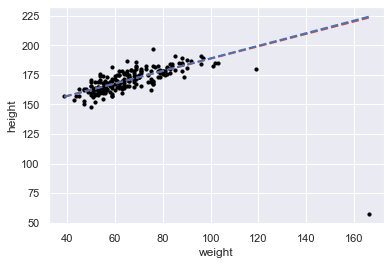

In [136]:
tx = np.linspace(x.min(),x.max(),100).reshape(-1,1)    # 予測点
txc = sm.add_constant(tx)
# プロット
plt.xlabel('weight'); plt.ylabel('height')
plt.scatter(x,y,s=10,c='black')
plt.plot(tx,rfh.predict(txc),'r--',lw=2)   # hampel
plt.plot(tx,rfb.predict(txc),'b--', lw=2)   # turkeyBiweight
plt.show()

# リッジ回帰

In [138]:
n = 100            # データ数
degree = 8         # 多項式モデルの次数
pardim = degree+1  # 回帰係数の次元

In [141]:
np.random.normal(scale=0.5,size=n).mean()

-0.0070626766856457125

In [142]:
# データ生成
x = np.random.uniform(-2,2,n)#-2から2のn個のランダムな数値
#sin(-4π ~ 4pi)でxの絶対値に相関して値が減少。ノイズとして正規分布に従う乱数を足す。
y = np.sin(2*np.pi*x)/x + np.random.normal(scale=0.5,size=n)

In [145]:
x[:5]

array([-1.1764111 ,  0.69619772,  1.18412761,  0.77440074, -0.59802351])

In [156]:
# np.powerはべき乗計算
np.power([1,2,3],[2,3,4])# [1**2, 2**3, 3**4]

array([ 1,  8, 81])

In [158]:
# np.outerは外積計算
np.outer([1,2,3],[2,3,4])# [[1*2, 1*3, 1*4], [2*2, 2*3, 2*4], [3*2, 3*3, 3*4]]

array([[ 2,  3,  4],
       [ 4,  6,  8],
       [ 6,  9, 12]])

In [164]:
# 外積と同じ順番でpower計算をさせる用法（結構レア？）
np.power.outer([1,2,3],[2,3,4])# [[1**2, 1**3, 1**4], [2**2, 2**3, 2**4], [3**2, 3**3, 3**4]]

array([[ 1,  1,  1],
       [ 4,  8, 16],
       [ 9, 27, 81]])

In [146]:
np.arange(pardim)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [166]:
mxc = np.power.outer(x,np.arange(pardim))            
''' 
指定した多項式次元に対応するx**nを作成
[[x[0]**0, x[0]**1, x[0]**2, ... , x[0]**n],
    [x[1]**0, x[1]**1, x[1]**2, ... , x[1]**n],
    ...
    [x[m]**0, x[m]**1, x[m]**2, ... , x[m]**n]
''';

In [167]:
# n行 x n列の単位行列(identity matrix)を作成
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [169]:
mxc.shape

(100, 9)

In [171]:
IE = np.identity(mxc.shape[1])
IE

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [172]:
IE[0,0] = 0          # 行列 I-E_11
IE

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [17]:
# 回帰係数の推定値
np.linalg.solve(np.dot(mxc.T,mxc) + 1*IE, np.dot(mxc.T,y))  

array([ 2.71487994,  0.87873874, -5.43255932, -0.82233846,  2.82405799,
        0.2377766 , -0.47497229, -0.02334212,  0.01085879])

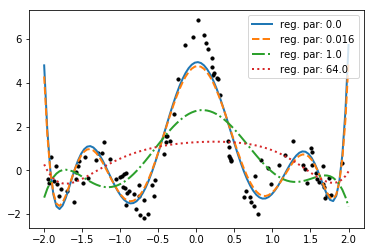

In [18]:
plt.scatter(x,y,c='black',s=10)              # データ点プロット
tx = np.linspace(-2,2,100)                   # テスト点
tpx = np.power.outer(tx,np.arange(pardim))   # テスト点でのデータ行列
a  = np.array([0, 2**(-6), 1, 2**6])         # 正則化パラメータの候補
ls = ['-','--','-.',':']                     # プロットのラインスタイル
for i in np.arange(a.size):
    theta = np.linalg.solve(np.dot(mxc.T,mxc)+a[i]*IE, np.dot(mxc.T,y))
    py = np.dot(tpx,theta)                   # 予測値
    # プロット  
    plt.plot(tx,py,label="reg. par: "+str(round(a[i],3)),ls=ls[i],lw=2) 
plt.legend()
plt.show()

In [19]:
## libraryで計算
n = 100; degree = 8; pardim = degree+1       # データ生成の設定
x = np.random.uniform(-2,2,n)
y = np.sin(2*np.pi*x)/x + np.random.normal(scale=0.5,size=n)
mx = np.power.outer(x,np.arange(pardim))   # データ行列
# 正則化パラメータの設定：定数項は正則化項に含めない．
alpha = 0.01; rp = np.r_[0,np.repeat(alpha/n,degree)] 
ri = sm.OLS(y,mx).fit_regularized(alpha=rp, L1_wt=0) # リッジ回帰
ri.params                                # 推定された回帰係数

array([  4.81560657,  -0.75178298, -19.15713103,   0.98758461,
        20.21508901,  -0.35160331,  -7.74366096,   0.03764018,
         0.96904675])

In [20]:
np.linalg.solve(np.dot(mx.T,mx) + alpha*IE, np.dot(mx.T,y))

array([  4.81560657,  -0.75178298, -19.15713103,   0.98758461,
        20.21508901,  -0.35160331,  -7.74366096,   0.03764018,
         0.96904675])

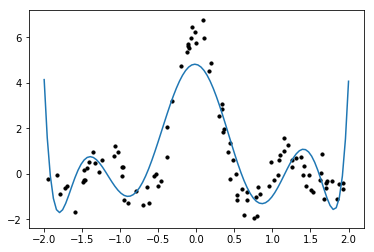

In [21]:
# plot
tx = np.linspace(-2,2,100)                  # 予測点
txc = np.power.outer(tx,np.arange(pardim))  
py = ri.predict(txc)                        # 予測値
plt.scatter(x,y,c='black',s=10)             # データ点プロット
plt.plot(tx,py)
plt.show()

# カーネル回帰分析

In [22]:
# カーネル回帰
from sklearn.kernel_ridge import KernelRidge

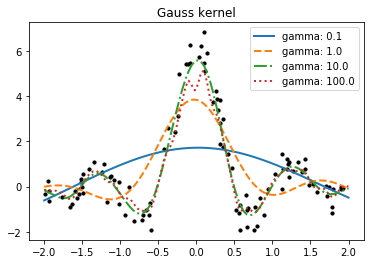

In [23]:
# 計算 & プロット
from sklearn.kernel_ridge import KernelRidge # kernel_ridge モジュール読込み
n = 100                               # データ生成
x = np.random.uniform(-2,2,n); X = x.reshape(-1,1)
y = np.sin(2*np.pi*x)/x + np.random.normal(scale=0.5,size=n)
tx = np.linspace(-2,2,100)                    # テスト点
g = np.array([0.1,1,10,100])                  # gammaの候補
l = ['-','--','-.',':']                       # プロットのラインスタイル
plt.title('Gauss kernel')                   
plt.scatter(x,y,c='black',s=10)               # データ点プロット
for i in np.arange(len(g)):               # カーネル回帰(ガウスカーネル)
    kr = KernelRidge(alpha=1,kernel='rbf',gamma=g[i])
    kr.fit(X, y)                              # データへのあてはめ
    py = kr.predict(tx.reshape(-1,1))         # 予測値の計算
    plt.plot(tx,py,label="gamma: "+str(round(g[i],3)),ls=l[i],lw=2)

plt.legend()
plt.show()